# Practicum: Loan Approval Prediction

Build a Machine Learning Model with the Best Accuracy to predict the Loan Status.

# Definition & Working principle


The process of loan approval plays a critical role in the financial sector, as it determines the feasibility of granting loans to individuals or businesses. Accurate prediction of loan approval or rejection is crucial for financial institutions to mitigate risks and make informed lending decisions. With the advent of advanced data analytics and machine learning techniques, the prediction of loan approvals has been revolutionized.

This project aims to develop a data-driven approach for loan approval prediction using state-of-the-art machine learning algorithms. By leveraging historical loan application data, credit scores, financial statements, and other relevant features, the project aims to build a predictive model that can effectively assess creditworthiness and predict the likelihood of loan approval for future loan applicants.

The proposed system offers numerous benefits, including improved efficiency, reduced bias, and increased accuracy in loan decision-making processes. By automating the loan approval process, financial institutions can save time and resources while ensuring fairness and consistency. Furthermore, borrowers can benefit from faster loan processing times and increased transparency. This project holds immense potential to enhance lending practices, minimize risks, and optimize the loan approval process for both lenders and borrowers alike.

# Import Library and Dataset
 Import Python libraries required for our analysis and import dataset 

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
# Import dataset
dataset = pd.read_csv("Loan.csv")
print('\nNumber of rows and columns in the data set: ',dataset.shape)
print('')
dataset


Number of rows and columns in the data set:  (614, 13)



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.head() #Lets look into top few rows and columns in the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleansing and Handling Missing Values
 Cleaning Dataset and filling values in missing cells to make our model more accurate 

In [6]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
dataset.drop('Loan_ID',axis=1,inplace=True)

In [9]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [10]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [11]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [12]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

In [13]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [14]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [15]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace=True)

In [16]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [17]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Analysis

In [18]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
dataset.shape

(614, 12)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


###  Checking for missing value

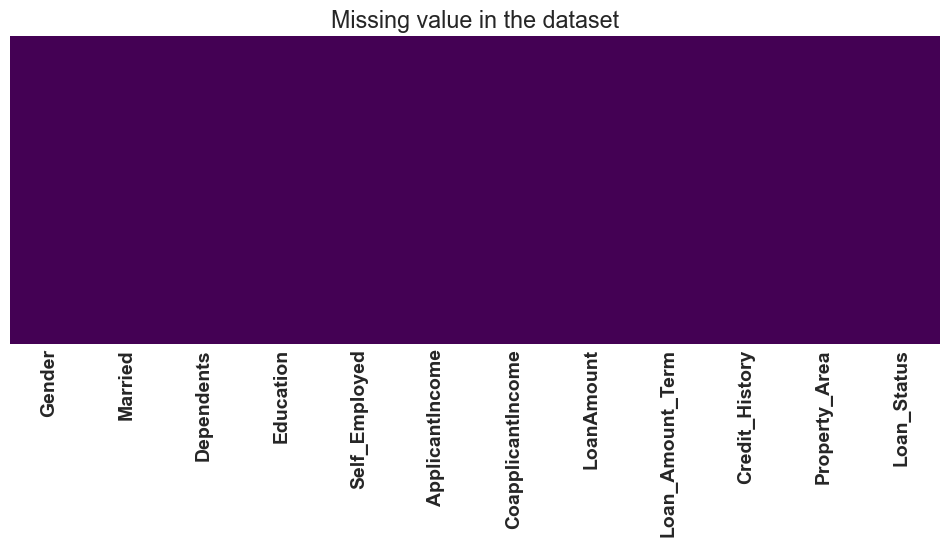

In [21]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing value in the dataset

# Data Visualisation

###  Effects of Different Features 

####  Effect of Gender

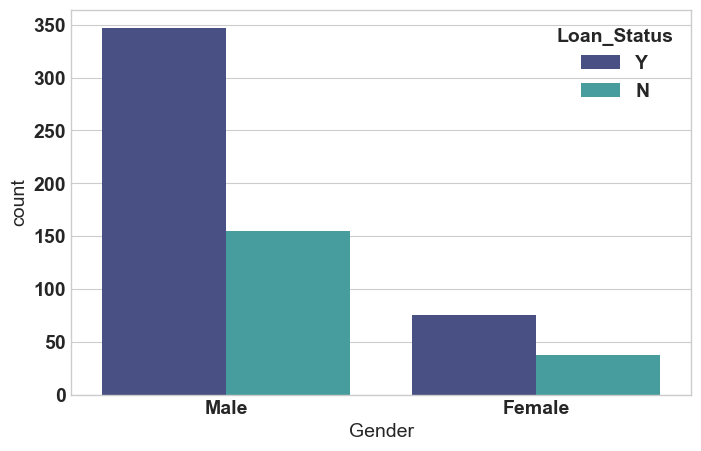

In [22]:
sns.countplot(x ='Gender',hue='Loan_Status',data = dataset,palette = "mako")
plt.show() 

####  Effect of Education

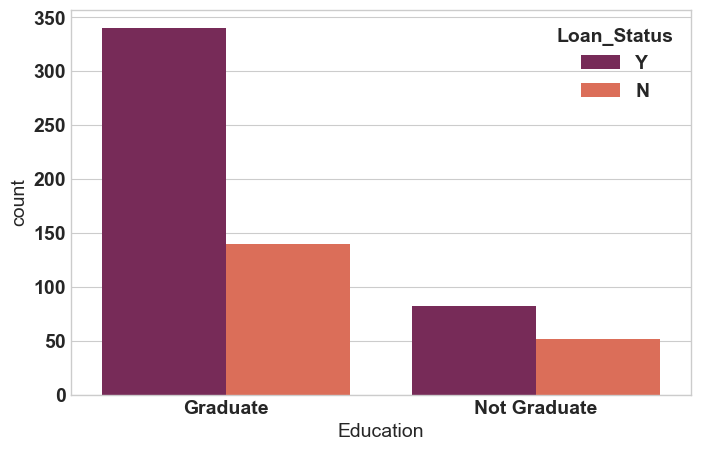

In [23]:
sns.countplot(x ='Education',hue='Loan_Status',data = dataset,palette = "rocket")
plt.show()

####  Effect of Marital Status

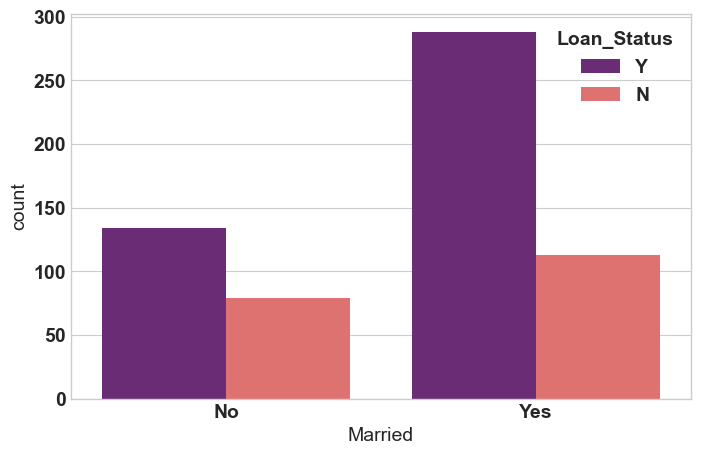

In [24]:
sns.countplot(x ='Married',hue='Loan_Status', data = dataset,palette = "magma")
plt.show()

####  Effect of Self Employement

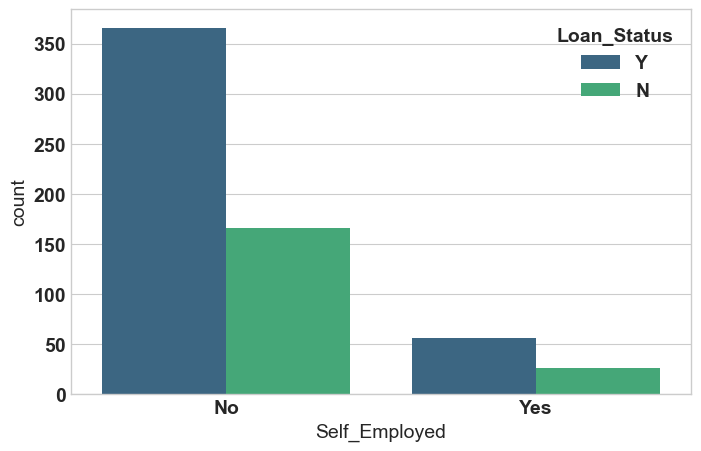

In [25]:
sns.countplot(x ='Self_Employed',hue='Loan_Status', data = dataset,palette = "viridis")
plt.show()

####  Effect of Credit History

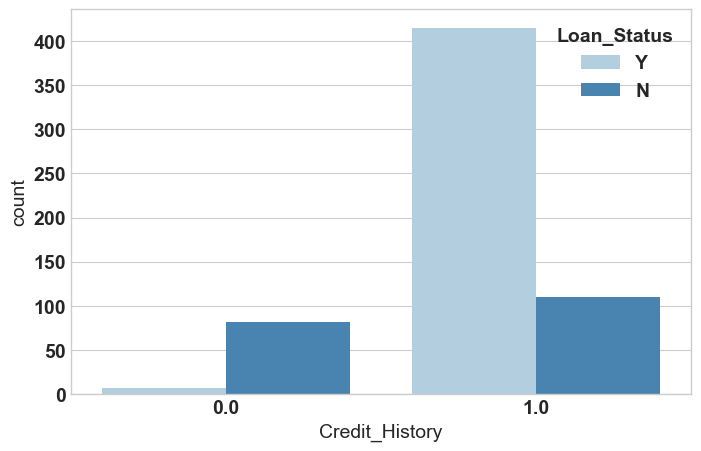

In [26]:
sns.countplot(x ='Credit_History',hue='Loan_Status', data = dataset,palette = "Blues")
plt.show()

####  Effect of Area

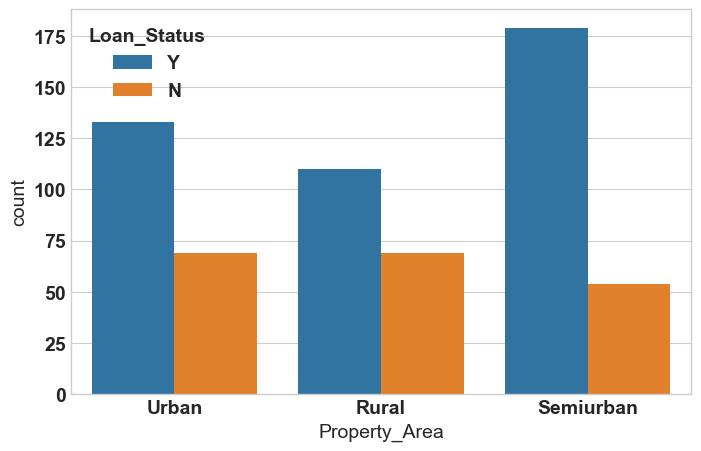

In [27]:
sns.countplot(x ='Property_Area',hue='Loan_Status', data = dataset)
plt.show()

###  Loan Status Analysis

In [28]:
print('Approved: %.2f' % (dataset['Loan_Status'].value_counts()[0]/len(dataset)*100))
print('Not Approved: %.2f' % (dataset['Loan_Status'].value_counts()[1]/len(dataset)*100))

Approved: 68.73
Not Approved: 31.27


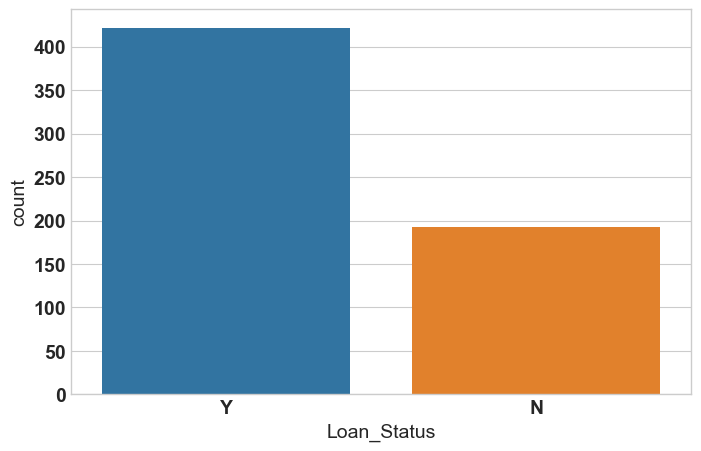

In [29]:
sns.countplot(x ='Loan_Status', data = dataset)
plt.show()

###  Applicant Income Graph

C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


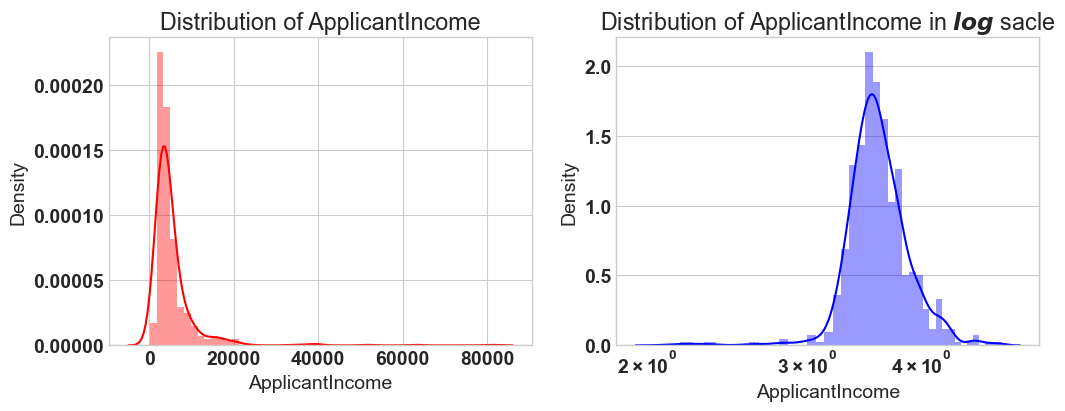

In [30]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(dataset['ApplicantIncome'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of ApplicantIncome')

ax=f.add_subplot(122)
sns.distplot(np.log10(dataset['ApplicantIncome']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of ApplicantIncome in $log$ sacle')
ax.set_xscale('log');

C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


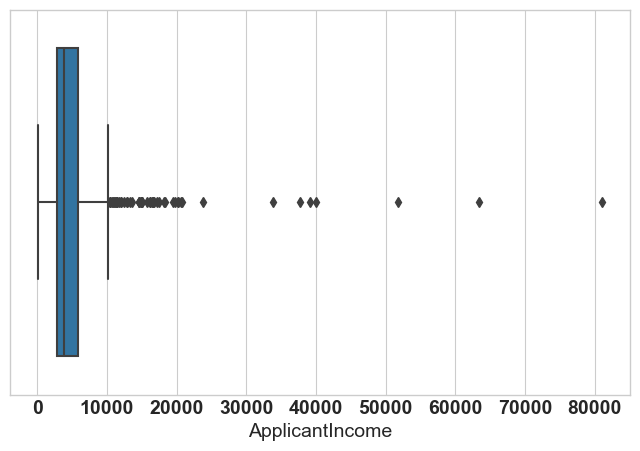

In [31]:
sns.boxplot(dataset['ApplicantIncome'])
plt.show()

###  Coapplicant Income Graph

C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Coapplicant Income')

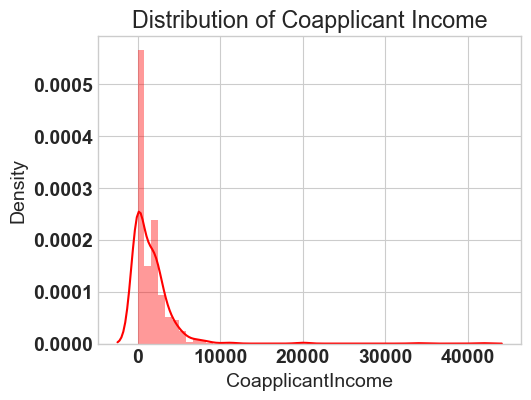

In [32]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(dataset['CoapplicantIncome'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Coapplicant Income')


C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


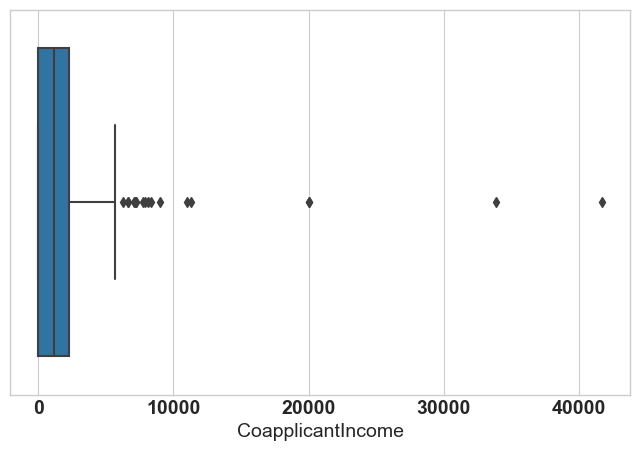

In [33]:
sns.boxplot(dataset['CoapplicantIncome'])
plt.show()

###  Loan Amount Graph

C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


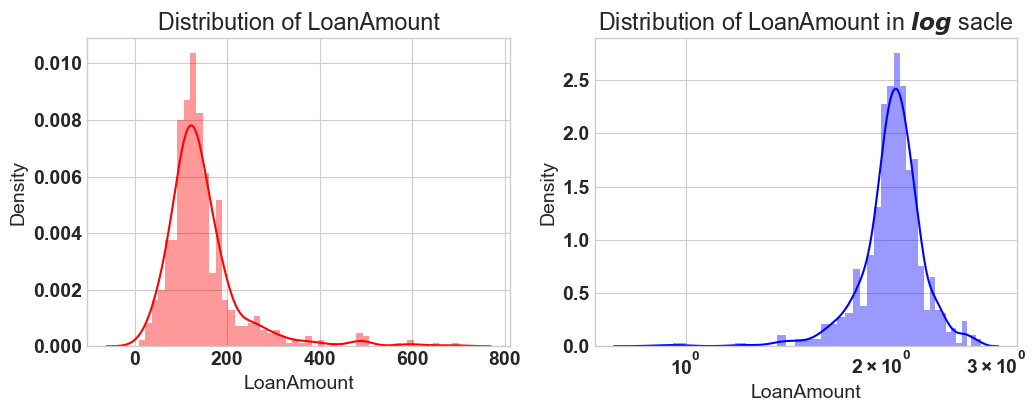

In [34]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(dataset['LoanAmount'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of LoanAmount')

ax=f.add_subplot(122)
sns.distplot(np.log10(dataset['LoanAmount']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of LoanAmount in $log$ sacle')
ax.set_xscale('log');

C:\Users\abhi3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


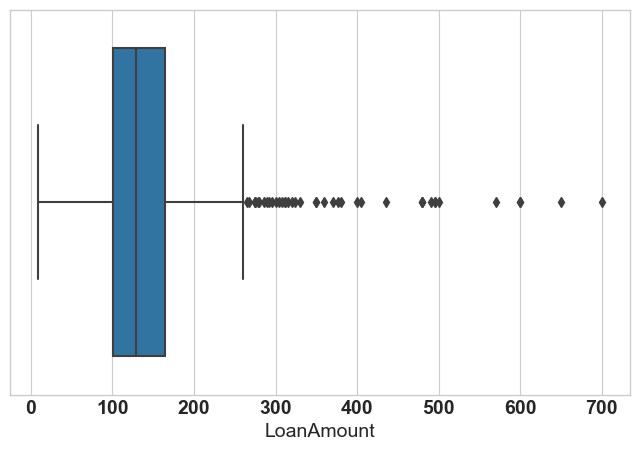

In [35]:
sns.boxplot(dataset['LoanAmount'])
plt.show()

# Data Corelation

In [36]:
dataset.corr() # correlation 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


### Plots

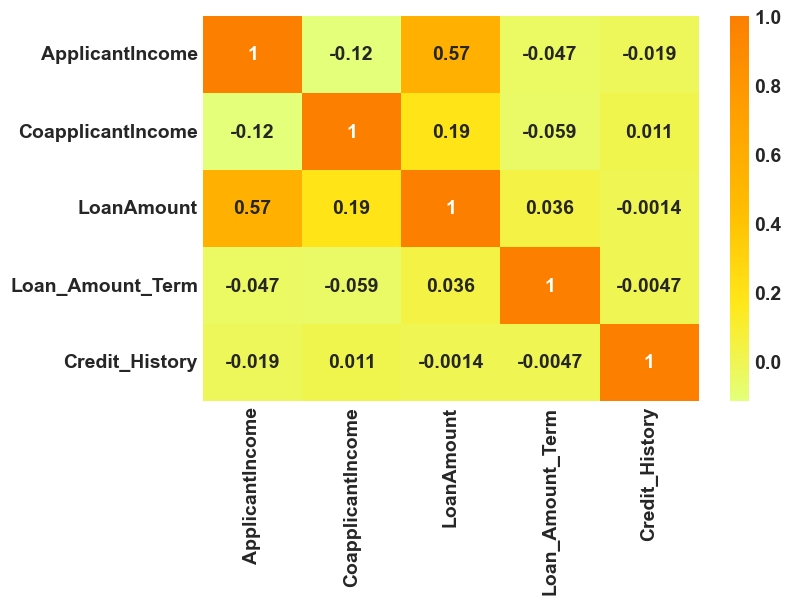

In [37]:
# correlation plot
corr = dataset.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

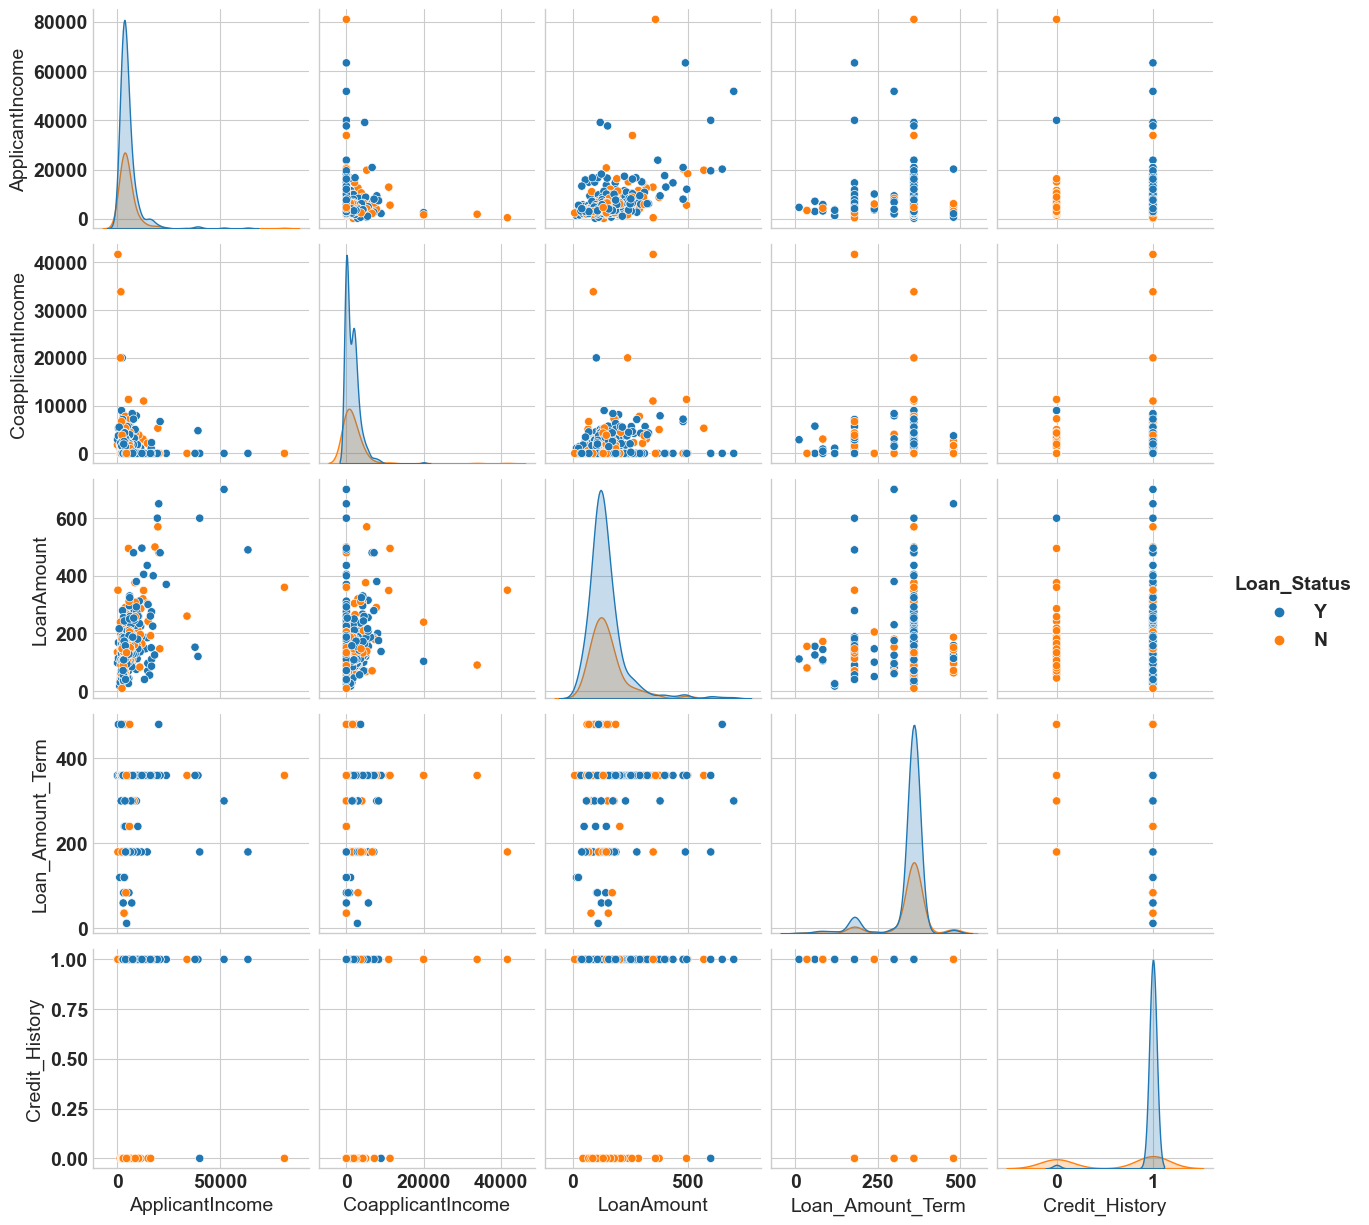

In [38]:
sns.pairplot(dataset, hue='Loan_Status')
plt.show()

# Data Preprocessing 2.0

### One-hot Encoding

In [39]:
dataset = pd.get_dummies(dataset)

# Drop columns
dataset = dataset.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
dataset.rename(columns=new, inplace=True)

### Removing Outliers & Infinite values 

In [40]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

### Skewed Distribution Treatment

In [41]:
dataset.ApplicantIncome = np.sqrt(dataset.ApplicantIncome)
dataset.CoapplicantIncome = np.sqrt(dataset.CoapplicantIncome)
dataset.LoanAmount = np.sqrt(dataset.LoanAmount)

# Training and Testing

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import math

In [45]:
x = dataset.drop("Loan_Status",1)
y = dataset[["Loan_Status"]]

C:\Users\abhi3\AppData\Local\Temp\ipykernel_5448\3336259780.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = dataset.drop("Loan_Status",1)


In [46]:
x, y = SMOTE().fit_resample(x, y)

In [47]:
x = MinMaxScaler().fit_transform(x)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Logistic Regression

In [49]:
LR_Model= LogisticRegression(solver='saga', max_iter=500, random_state=1)

In [50]:
LR_Model.fit(x_train, y_train)

C:\Users\abhi3\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=500, random_state=1, solver='saga')

In [51]:
LR_y_pred= LR_Model.predict(x_test)

In [52]:
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.83      0.86      0.84        22

    accuracy                           0.84        45
   macro avg       0.84      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



In [53]:
print(confusion_matrix(y_test, LR_y_pred))

[[19  4]
 [ 3 19]]


In [54]:
print('MSE : ' , mean_squared_error(y_test, LR_y_pred))

MSE :  0.15555555555555556


In [55]:
print('RMSE : ' , math.sqrt(mean_squared_error(y_test, LR_y_pred)))

RMSE :  0.39440531887330776


In [56]:
print("R2 Score : " , r2_score(y_test,LR_y_pred))

R2 Score :  0.37747035573122545


In [57]:
LR_Acc = accuracy_score(LR_y_pred,y_test)
print('Accuracy: {:.2f}%'.format(LR_Acc*100))

Accuracy: 84.44%


### K-Nearest Neighbour (KNN)

In [58]:
KNN_Model = KNeighborsClassifier(n_neighbors=5)

In [59]:
KNN_Model.fit(x_train,y_train)

C:\Users\abhi3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [60]:
knn_y_pred= KNN_Model.predict(x_test)

C:\Users\abhi3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.90      0.82      0.86        22

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [62]:
print(confusion_matrix(y_test, knn_y_pred))

[[21  2]
 [ 4 18]]


In [63]:
print('MSE : ' , mean_squared_error(y_test, knn_y_pred))

MSE :  0.13333333333333333


In [64]:
print('RMSE : ' , math.sqrt(mean_squared_error(y_test, knn_y_pred)))

RMSE :  0.3651483716701107


In [65]:
print("R2 Score : " , r2_score(y_test,knn_y_pred))

R2 Score :  0.46640316205533605


In [66]:
KNN_Acc = accuracy_score(knn_y_pred,y_test)
print('KNN Accuracy: {:.2f}%'.format(KNN_Acc*100))

KNN Accuracy: 86.67%


### Support Vector Machine (SVM)

In [67]:
SVM_Model = SVC(kernel='rbf', max_iter=500)

In [68]:
SVM_Model.fit(x_train, y_train)

C:\Users\abhi3\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(max_iter=500)

In [69]:
svm_y_pred= SVM_Model.predict(x_test)

In [70]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.84      0.95      0.89        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [71]:
print(confusion_matrix(y_test, svm_y_pred))

[[19  4]
 [ 1 21]]


In [72]:
print('MSE : ' , mean_squared_error(y_test, svm_y_pred))

MSE :  0.1111111111111111


In [73]:
print('RMSE : ' , math.sqrt(mean_squared_error(y_test, svm_y_pred)))

RMSE :  0.3333333333333333


In [74]:
print("R2 Score : " , r2_score(y_test,svm_y_pred))

R2 Score :  0.5553359683794468


In [75]:
SVM_Acc = accuracy_score(svm_y_pred,y_test)
print('SVM Accuracy: {:.2f}%'.format(SVM_Acc*100))

SVM Accuracy: 88.89%


### Naive Bayes

In [76]:
NB_model = CategoricalNB()

In [77]:
NB_model.fit(x_train, y_train)

C:\Users\abhi3\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

In [78]:
nb_y_pred= NB_model.predict(x_test)

In [79]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.72      0.82      0.77        22

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.75        45



In [80]:
print(confusion_matrix(y_test, nb_y_pred))

[[16  7]
 [ 4 18]]


In [81]:
print('MSE : ' , mean_squared_error(y_test, nb_y_pred))

MSE :  0.24444444444444444


In [82]:
print('RMSE : ' , math.sqrt(mean_squared_error(y_test, nb_y_pred)))

RMSE :  0.4944132324730442


In [83]:
print("R2 Score : " , r2_score(y_test,nb_y_pred))

R2 Score :  0.021739130434782816


In [84]:
NB_Acc = accuracy_score(nb_y_pred,y_test)
print('NB Accuracy: {:.2f}%'.format(NB_Acc*100))

NB Accuracy: 75.56%


### Decision Tree

In [85]:
DT_Model = DecisionTreeClassifier(random_state=1)

In [86]:
DT_Model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [87]:
dt_y_pred = DT_Model.predict(x_test)

In [88]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        23
           1       0.93      0.64      0.76        22

    accuracy                           0.80        45
   macro avg       0.83      0.80      0.79        45
weighted avg       0.83      0.80      0.79        45



In [89]:
print(confusion_matrix(y_test, dt_y_pred))

[[22  1]
 [ 8 14]]


In [90]:
print('MSE : ' , mean_squared_error(y_test, dt_y_pred))

MSE :  0.2


In [91]:
print('RMSE : ' , math.sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE :  0.4472135954999579


In [92]:
print("R2 Score : " , r2_score(y_test,dt_y_pred))

R2 Score :  0.19960474308300413


In [93]:
DT_Acc = accuracy_score(dt_y_pred,y_test)
print('Accuracy: {:.2f}%'.format(DT_Acc*100))

Accuracy: 80.00%


### Random Forest

In [94]:
RF_Model = RandomForestClassifier(n_estimators=1000, random_state=1)

In [95]:
RF_Model.fit(x_train, y_train)

C:\Users\abhi3\AppData\Local\Temp\ipykernel_5448\2694628259.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=1)

In [96]:
rf_y_pred = RF_Model.predict(x_test)

In [97]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.95      0.95      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [98]:
print(confusion_matrix(y_test, rf_y_pred))

[[22  1]
 [ 1 21]]


In [99]:
print('MSE : ' , mean_squared_error(y_test, dt_y_pred))

MSE :  0.2


In [100]:
print('RMSE : ' , math.sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE :  0.4472135954999579


In [101]:
print("R2 Score : " , r2_score(y_test,dt_y_pred))

R2 Score :  0.19960474308300413


In [102]:
RF_Acc = accuracy_score(y_test, rf_y_pred)
print('RF accuracy: {:.2f}%'.format(RF_Acc*100))

RF accuracy: 95.56%


# Model Comparison

In [103]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [LR_Acc*100, KNN_Acc*100, SVM_Acc*100, 
                                     NB_Acc*100, DT_Acc*100, 
                                     RF_Acc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,95.555556
2,SVM,88.888889
1,K Neighbors,86.666667
0,Logistic Regression,84.444444
4,Decision Tree,80.000000
3,Categorical NB,75.555556


Random Forest Model has the Best Accuracy.

# Cross Validation of Random Forest

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
from sklearn.datasets import load_digits

In [106]:
digits = load_digits()

In [107]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=5)

In [108]:
print(score_rf)
print("Average Accuracy:",np.average(score_rf)*100)

[0.94166667 0.90833333 0.94986072 0.96100279 0.91364903]
Average Accuracy: 93.49025069637882
